
**Тренд**	Описывает чистое влияние долговременных факторов, изменяется плавно.
Пример: рост численности населения.

**Цикличность**	Состоит из циклов, меняющихся по длительности и амплитуде, описывает периоды подъёма и спада.
Пример: циклы в экономике, связанные с изменением спроса и предложения или с переменами в финансовой и налоговой политике.

**Сезонность**	Представляет собой последовательность почти повторяющихся циклов.
Пример: объёмы продаж цветов накануне 8 марта или авиабилетов в сезон отпусков летом.

**Шум (случайная компонента)**	Останется после вычитания всех вышеперечисленных компонентов. Не несёт никакого глубокого смысла.

ИНСТРУМЕНТЫ ДЛЯ ДЕКОМПОЗИЦИИ ВРЕМЕННОГО РЯДА

Разделить ряд на компоненты в Python можно с помощью библиотеки statsmodels. Если вы не устанавливали её ранее, это можно сделать стандартным способом (pip install statsmodels) или следуя рекомендациям в официальной документации.

В этом датасете представлены данные о количестве авиапассажиров в 1949-1960 годах. Рассмотрим некоторый временной ряд df из данного датасета.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("/Users/egor/Documents/data_science_course/SKILLFACTORY/MATH&ML-12. Временные ряды. Часть I/data/AirPassengers.csv", index_col='Month', parse_dates=['Month'])

Теперь рассмотрим код, в котором демонстрируется, как применять декомпозицию к временному ряду df.

Декомпозиция выполняется методом seasonal_decompose(), который принимает на вход временной ряд с одним признаком. Индексом ряда должна быть дата или время. Именно поэтому, считывая датасет, мы указываем индексом столбец month и приводим его к формату даты. Также, если вы знаете, что в вашем временном ряду присутствует период, его вы также можете передать в качестве параметра в seasonal_decompose(). Более подробно о необязательных параметрах можно узнать в документации.

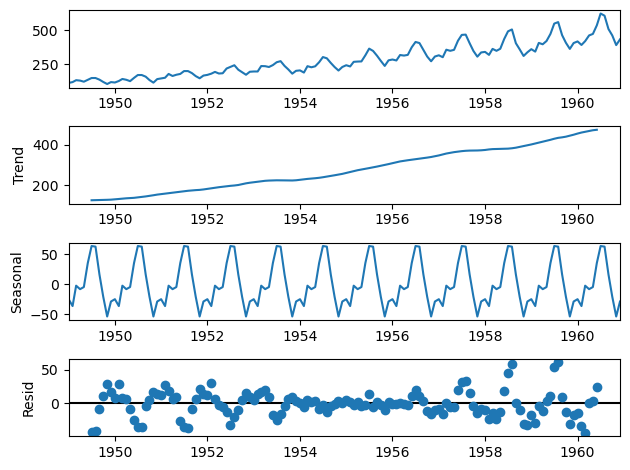

In [10]:
#импортируем библиотеку 
from statsmodels.tsa.seasonal import seasonal_decompose
#производим декомпозицию временного ряда 
decomposition = seasonal_decompose(df)
fig = decomposition.plot()
plt.show()

Одним из интересных способов анализа временного ряда является экспоненциальное сглаживание. Давайте разберёмся, что это такое и чем оно отличается от других методов прогнозирования.

Экспоненциальное сглаживание — это метод прогнозирования временных рядов для одномерных данных с трендом или сезонным компонентом. Оно также известно как метод простого экспоненциального сглаживания, или метод Брауна.

Обратите внимание, что формулу необязательно заучивать: главное — чтобы вы понимали принцип работы алгоритма.

В случае с этой формулой каждый новый элемент временного ряда рассчитывается от предыдущего и от сглаженного исходного.

Рассмотрим пример.

Нам известны значения температуры за прошедший месяц, и мы хотим предсказать погоду на следующий день. Мы можем предположить, что в этом случае погода завтра в большей степени будет зависеть от погоды вчера и сегодня, чем от погоды 30 дней назад. Если мы хотим учитывать удалённость значений от текущего момента, то экспоненциальное сглаживание пригодится тут как нельзя кстати.

Проще говоря, под экспоненциальным сглаживанием понимается взвешенная линейная сумма наблюдений, при этом веса для наблюдений экспоненциально уменьшаются для более старых наблюдений. Тем самым мы не обращаем особого внимания на поведение в прошлом, а недавнему поведению присваиваем больший вес. Если быть точнее, наблюдения взвешиваются с геометрически уменьшающимся коэффициентом.

In [14]:
def exp_smth(x_t, a, s_t_1):
    return a * x_t + (1 - a) * s_t_1

data = np.array([15, 20, 25, 30, 25, 27])
a = 0.7
s = np.zeros(6)
s[0] = data[0]

for i in range(1, len(data)):
    s[i] = exp_smth(data[i], a, s[i-1])

print(s)

[15.      18.5     23.05    27.915   25.8745  26.66235]


Так как по формуле значение для следующего дня рассчитывается от значения для текущего, мы можем продолжить получать следующие значения для экспоненциально сглаженного ряда, таким образом совершая прогноз (день за днём). В нашем примере для шестого дня мы получили прогнозируемое значение температуры в 26.6 градусов (26.66235, если быть точнее):


Коэффициент экспоненциального сглаживания подбирается интуитивно. Чем выше коэффициент, тем меньше внимания мы обращаем на старые данные. Если коэффициент близок к 0, данным в далёком прошлом будет уделено больше внимания. Так, при коэффициенте, равном 0.1, значения экспоненциально сглаженного ряда будут выглядеть так (сравните с предыдущим графиком):


В примере выше сглаженный ряд мы рассчитывали «вручную» по формуле, но делать это каждый раз нет необходимости, так как эта возможность уже встроена в библиотеку statsmodels. Для совершения предсказания методом простого экспоненциального сглаживания воспользуемся методом SimpleExpSmoothing из statsmodels.tsa.api.

Попробуйте запустить код ниже:

In [15]:
from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(data)

alpha = 0.7

model = ses.fit(smoothing_level = alpha, optimized = False)

forecast = model.forecast(1)

print(forecast)

[26.66235]
